In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load csv data
bike_rentals = pd.read_csv('./bike_rental_hour.csv')

In [2]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_rentals.columns # label is 'cnt' - the total number of bike rentals (casual + registered => dont use)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

(array([11856.,  2985.,  1262.,   496.,   313.,   194.,   150.,    82.,
           28.,    13.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

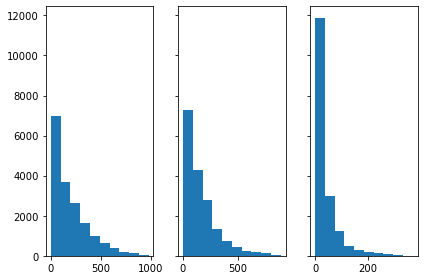

In [4]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(bike_rentals['cnt'])
axs[1].hist(bike_rentals['registered'])
axs[2].hist(bike_rentals['casual'])

From far left, we can see 'cnt' is right skewed. Should we perform log transform to make it look more Gaussian?

In [5]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [6]:
features = bike_rentals.columns
list(features)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

<AxesSubplot:>

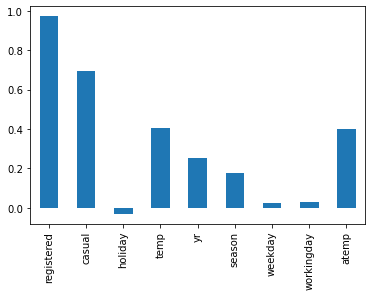

In [7]:
features = ['registered', 'casual', "holiday", "temp", 'yr', 'season', 'weekday', 'workingday', 'atemp']
bike_rentals.corr()['cnt'][features].plot.bar()

From the above bar plot, since we are not allowed to use 'registered' and 'casual', the next two best corr woul be 'temp' and 'yr'. Perhaps, better weather prompts people to go for more bike rides.

## Calculating Features
* Distilling existing information.
* Adding new feature categories before applying machine learning models.
* Introducing some 'order' for model to make better predictions.

In [8]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
def assign_label(hour):
    # from IPython import embed; embed()
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3
# use apply to assign label on each data row
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [10]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


## Splitting the Data Into Train and Test Sets

Because the the 'cnt' label is an analog value, it'll make the most sense to use MSE as our error metric.

In [11]:
# import sklearn's train and split api
from sklearn.model_selection import train_test_split
y = bike_rentals['cnt']
X = bike_rentals.drop('cnt', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, y_train.shape

((13903, 17), (13903,))

## Applying Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

predictors = list(X_train.columns)
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")
# instantiate LR clf
reg = LinearRegression()

reg.fit(X_train[predictors], y_train)

LinearRegression()

In [14]:
predictions = reg.predict(X_test[predictors])

np.mean((predictions - y_test) ** 2)

17125.9559469168

## MSE Error is very HIGH
Woah, the MSE is huge here. This is usually indicative of potential outliers in the bike rental count. MSE is very sensitive to large errors / outliers. Next, we can try Decision Trees

In [17]:

from sklearn.tree import DecisionTreeRegressor
# start of with min_samples_lead at 5 to split a node
reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(X_train[predictors], y_train)

DecisionTreeRegressor(min_samples_leaf=5)

In [19]:
predictions = reg.predict(X_test[predictors])

np.mean((predictions - y_test) ** 2)

2659.415098330879

Decision Tree seems to perform much better against MSE than that of the Linear Regressor. Why???
Perhaps, the fact that DTR is more non-linear compared to the LR, it'll be able to better fit the non-linear behavior of the 'cnt' label.

In [21]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(X_train[predictors], y_train)

RandomForestRegressor(min_samples_leaf=5)

In [22]:
predictions = reg.predict(X_test[predictors])

np.mean((predictions - y_test) ** 2)

1818.1174910715602

Random Forst is even better. We have mitigated some of the overfitting behavior of the DTR via using m